Students:
- Venecia Carolina Melendez Angulo
- Diego Alejandro Quiñones Rudón

# Support Vector Machines

Suport Vector MAchines (SVM) are _"a type of supervised machine learning algorithm that provides analysis of data for regression analysis and specially **classification."**_[1]


Where a value of each feature is also the value of the specific coordinate in a n-dimensional plane.

It basically consists of finding a line that manages to separate/divide values of a data under certain characteristics. Where SVM applies a technique that consists of taking into account the two closest values of different classes (the objective values). These points will be known as **Support Vectors** whose distance is known as **Margin**.

The purpose of SVM is to **maximize** the margin line. Since when reaching its maximum value, the proposed dividing line (hyperplane) becomes the optimum for data classification.

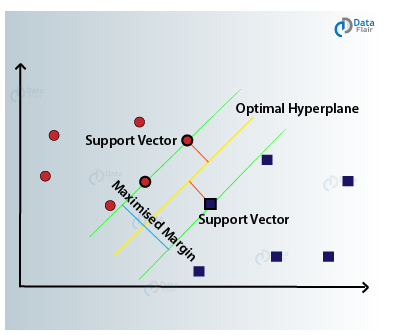
                                            _Image retrieved from [1]_

In this way, using Support Vector Machine it is possible to classify the data in an optimal way. And it gives confidence that the data to be predicted/future can be correctly classified.

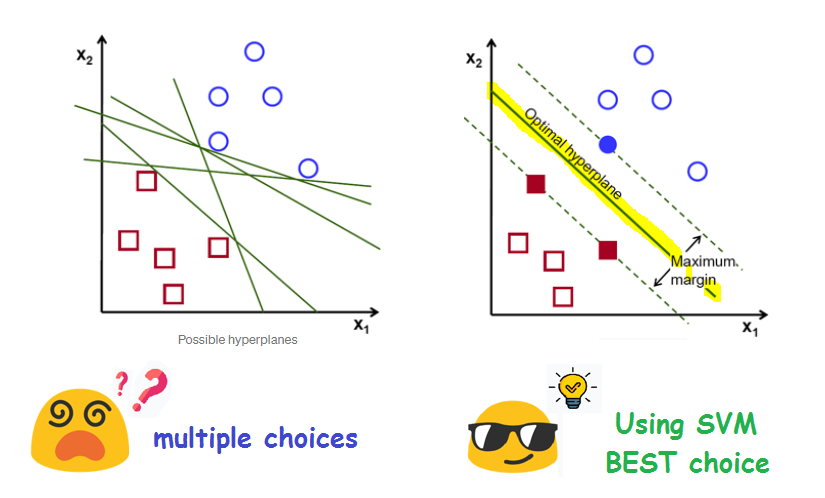
                                            _Image retrieved from [3]_

Note: In this simple example we have two dimensions where the hyperplane is one dimension. But for data with larger dimensions, the dimension of the hyperplane that divides the (data) space also increases.

Where the dimensions are the number of features.
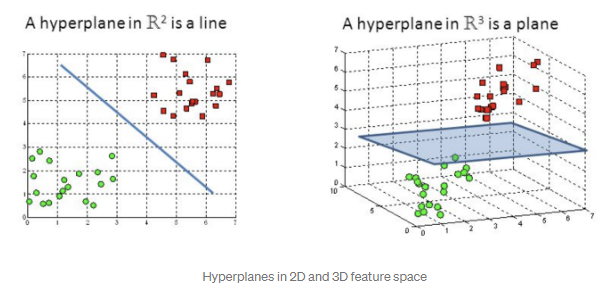
                                            _Image retrieved from [3]_

### Importance of Support Vectors
As stated above, the closest points of different classes are known as support vectors. That there are not only two, they can be more and with the help of these the dividing line (hyperplane) manages to accommodate itself and have the proper orientation.

_"Influence the position and orientation of the hyperplane"._ [3]
















.

.

## Training a model using Support Vector Machine (SVM)
This time we will use the dataset of online class student adaptability to train a model using Support Vecto Machine.

The necessary libraries are imported

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

We will prepare the data with which we are going to train the model.
And just like the case with neural networks, one hot encoding will be applied to be able to input numerical data to the model.

In [8]:
datasetDirecction = "./data/training_test_data/training-ds.csv"
data_students = pd.read_csv(datasetDirecction)
data_students.head()

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto


In [10]:
# one hot enconding implemented
data_students_training = pd.get_dummies(data_students, columns=["Tipo de Red", "Estudiante de Tecnología", "Nivel de Educación", "Vive en Ciudad", "Tipo de Instituto", "Edad", "Dispositivo", "Tipo de Internet", "Situación Financiera", "Género", "Duración de la Clase"])
data_students_training["Nivel de Adaptación"] = data_students_training["Nivel de Adaptación"].astype('category').cat.codes
data_students_training

,Nivel de Adaptación,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,2,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0,0,0,1,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
960,2,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
961,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0
962,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


We separate the data, the values that will be the input (dataset) and the objective values (dataset_y). Afterwards, we split the data with the help of **train_test_split** to have data to train the model and data to test it. With a distribution of 80% for train and 20% for test (train_size=0.8 )

In [11]:
dataset_x = data_students_training.iloc[0:,1:].to_numpy()
dataset_y = data_students_training.iloc[0:,0].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, train_size=0.8)

Now we implement the model using SVM

After we have pre-processed our data, the next step is the implementation of the SVM model as follows. We will make use of the SVC function provided to us by the sklearn library. In this instance, we will select our kernel as ‘rbf’.

In [17]:
from sklearn.svm import SVC

kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel_type in kernel_types:
    SVM = SVC(kernel=kernel_type, random_state=0, gamma=.10, C=1.0)
    SVM.fit(x_train, y_train)
    
    print()
    print(f"--> With kernel {kernel_type}")
    print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(SVM.score(x_train, y_train)))
    print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(x_test, y_test)))


--> With kernel linear
Accuracy of our SVM model on the training data is 0.67 out of 1
Accuracy of our SVM model on the test data is 0.64 out of 1

--> With kernel poly
Accuracy of our SVM model on the training data is 0.82 out of 1
Accuracy of our SVM model on the test data is 0.73 out of 1

--> With kernel rbf
Accuracy of our SVM model on the training data is 0.78 out of 1
Accuracy of our SVM model on the test data is 0.69 out of 1

--> With kernel sigmoid
Accuracy of our SVM model on the training data is 0.58 out of 1
Accuracy of our SVM model on the test data is 0.59 out of 1


In this case, we have a better model using a **poly** kernel, obtaining an accuracy value of 73 with test data

# Making a prediction
Using the SVM model we make the predictions of our original test dataset. Where we perform the same one-hot encoding process

In [19]:
datasetDirecction = "./data/training_test_data/test-ds.csv"
data_students_test = pd.read_csv(datasetDirecction)
data_students_test = pd.get_dummies(data_students_test, columns=None)
data_students_test

,Tipo de Red_2G,Tipo de Red_3G,Tipo de Red_4G,Estudiante de Tecnología_No,Estudiante de Tecnología_Si,Nivel de Educación_Colegio,Nivel de Educación_Escuela,Nivel de Educación_Universidad,Vive en Ciudad_No,Vive en Ciudad_Si,...,Tipo de Internet_Compra Megas,Tipo de Internet_Wifi,Situación Financiera_Buena,Situación Financiera_Mala,Situación Financiera_Media,Género_Femenino,Género_Masculino,Duración de la Clase_0,Duración de la Clase_01-Mar,Duración de la Clase_03-Jun
0,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0
3,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
237,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
238,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
239,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [20]:
# Selecting the model with the best acc test result
SVM = SVC(kernel='poly', random_state=0, gamma=.10, C=1.0)
SVM.fit(x_train, y_train)

SVC(gamma=0.1, kernel='poly', random_state=0)

In [22]:
dataset_test_x = data_students_test.iloc[0:].to_numpy()
predicted_names = []
predicted_indexes = []
labels_map = {
    0: "Alto",
    1: "Bajo",
    2: "Moderado"
}
for row in dataset_test_x:
    predicted_vector = SVM.predict(np.array([row]))
    predicted_indexes.append(predicted_vector[0])
    predicted_name = labels_map[predicted_vector[0]]
    predicted_names.append(predicted_name)

predicted_data = pd.DataFrame({'Nivel de Adaptación': np.array(predicted_names), 'Indices': np.array(predicted_indexes)})
predicted_data

,Nivel de Adaptación,Indices
0,Bajo,1
1,Bajo,1
2,Bajo,1
3,Bajo,1
4,Bajo,1
...,...,...
236,Moderado,2
237,Moderado,2
238,Moderado,2
239,Moderado,2


In [23]:
predicted_data.to_csv('./data/predicted_data/predicted-SVM-ds.csv')

# Fuentes 
- [1] https://data-flair.training/blogs/svm-support-vector-machine-tutorial/
- [2] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- [3] https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47